In [86]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
ps=pd.read_csv("C:/Users/pjspr/OneDrive/Desktop/coding/salaryPrediction.csv")
ps

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [88]:
ps.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [89]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [90]:
le=preprocessing.LabelEncoder()

In [91]:
ps['income']=le.fit_transform(ps['income'])


In [92]:
ps.head(25)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [93]:
ps['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

0 are 76 %

1 are 24 %

In [94]:
ps['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [95]:
ps['occupation'].replace('?',np.NaN,inplace=True)
ps['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [96]:
ps['native-country'].replace('?',np.NaN,inplace=True)
ps['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [97]:
ps['workclass'].replace('?',np.NaN,inplace=True)
ps['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [98]:
ps.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [99]:
x=ps.mean()
x

C:\Users\pjspr\AppData\Local\Temp\ipykernel_19324\1921693928.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=ps.mean()


age                    38.643585
fnlwgt             189664.134597
educational-num        10.078089
capital-gain         1079.067626
capital-loss           87.502314
hours-per-week         40.422382
income                  0.239282
dtype: float64

In [100]:
y=ps.median()
y

C:\Users\pjspr\AppData\Local\Temp\ipykernel_19324\971695730.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  y=ps.median()


age                    37.0
fnlwgt             178144.5
educational-num        10.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         40.0
income                  0.0
dtype: float64

In [101]:
z=ps.mode()
z

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0


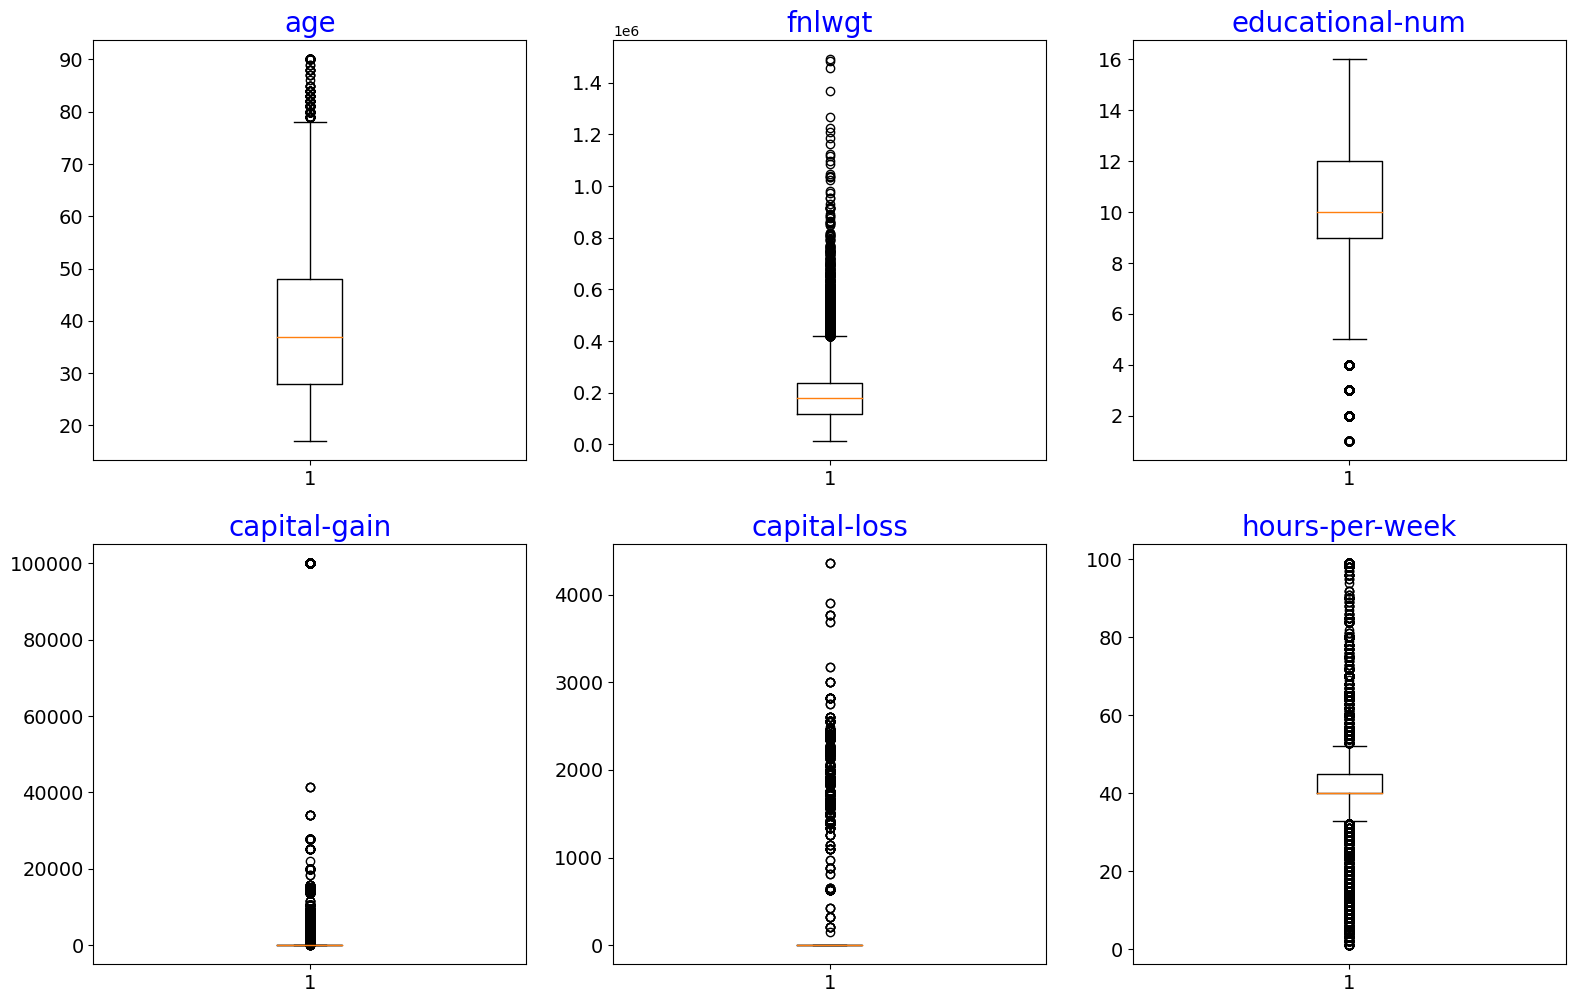

In [102]:
plt.figure(figsize=(19,12))


num_feat = ps.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(ps[num_feat[i]])
    plt.title(num_feat[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)



In [103]:
from scipy.stats.mstats import winsorize
ps["age"]  = winsorize(ps["age"],(0,0.10))
ps["fnlwgt"]= winsorize(ps["fnlwgt"],(0,0.10))
ps["educational-num"]= winsorize(ps["educational-num"],(0,0.099))
ps["capital-gain"] = winsorize(ps["capital-gain"],(0,0.099))
ps["capital-loss"] = winsorize(ps["capital-loss"],(0,0.099))
ps["hours-per-week"]= winsorize(ps["hours-per-week"],(0.10,0.20))



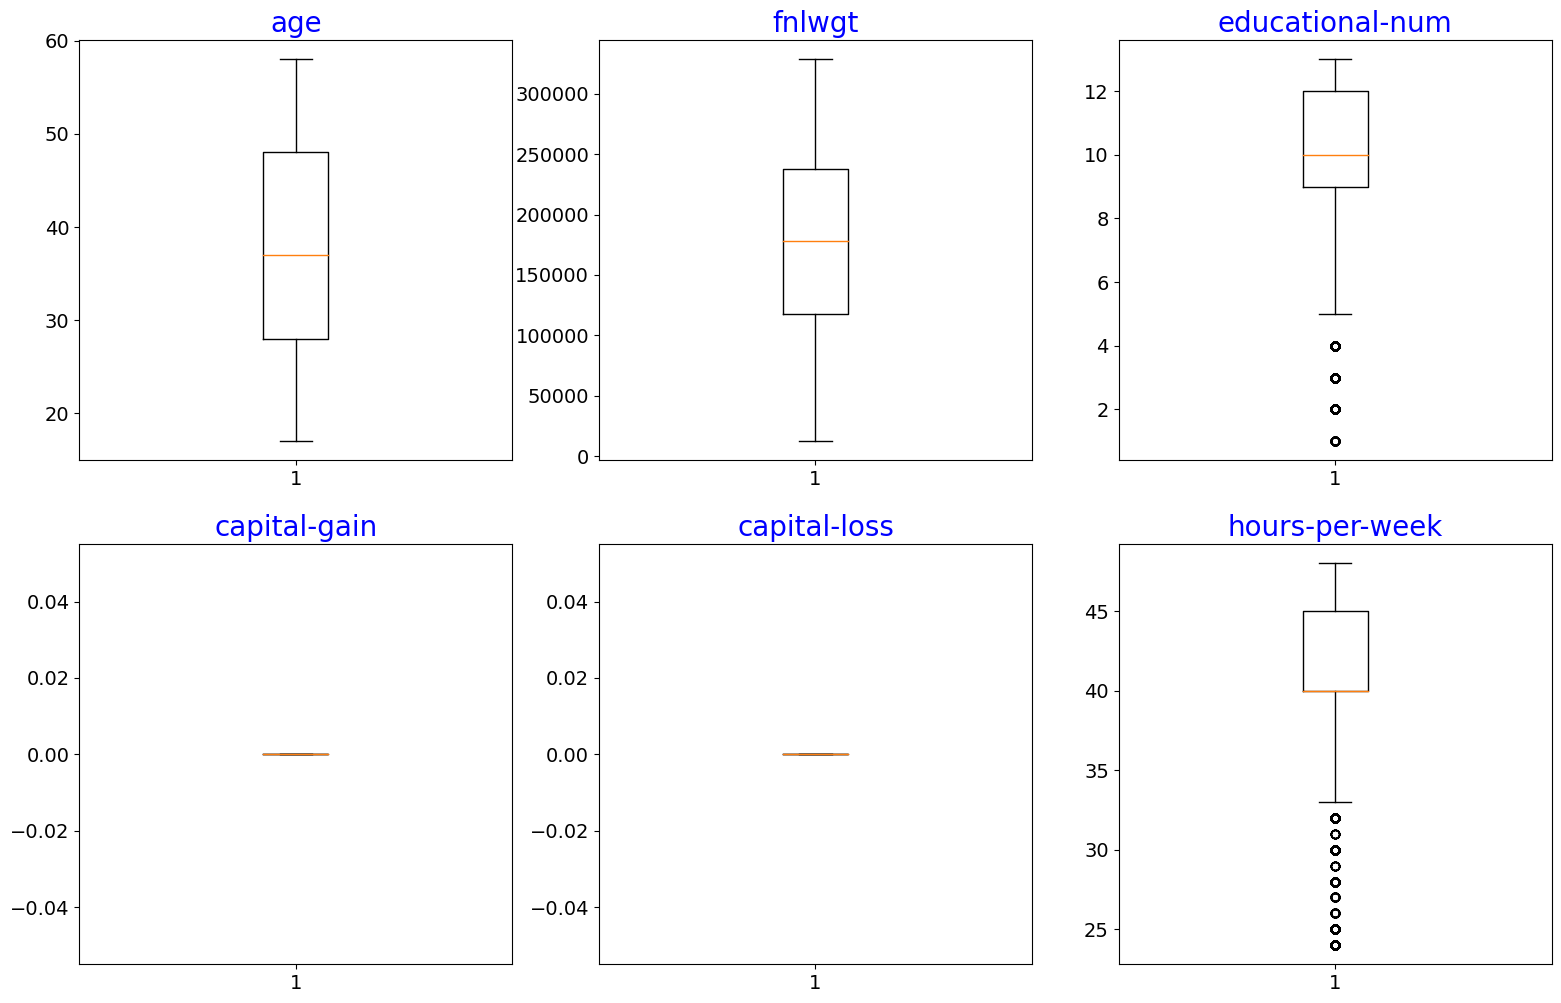

In [104]:
plt.figure(figsize=(19,12))


num_feat = ps.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(ps[num_feat[i]])
    plt.title(num_feat[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)



In [105]:
from sklearn.preprocessing import minmax_scale,StandardScaler
from sklearn.model_selection import train_test_split

In [106]:
x=ps[['fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']]
y=ps['age']

In [107]:
x

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,226802,7,0,0,40
1,89814,9,0,0,48
2,328466,12,0,0,40
3,160323,10,0,0,40
4,103497,10,0,0,30
...,...,...,...,...,...
48837,257302,12,0,0,38
48838,154374,9,0,0,40
48839,151910,9,0,0,40
48840,201490,9,0,0,24


In [108]:
y

0        25
1        38
2        28
3        44
4        18
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 48842, dtype: int64

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [110]:
x_train

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
8794,99297,9,0,0,40
41640,94559,13,0,0,48
11371,29488,13,0,0,40
1063,173309,4,0,0,24
14845,31286,11,0,0,40
...,...,...,...,...,...
17524,167414,9,0,0,48
31228,277408,10,0,0,35
1532,328466,3,0,0,40
41836,78765,10,0,0,40


In [111]:
x_test

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
35397,213412,10,0,0,40
3903,328466,7,0,0,40
5824,328466,10,0,0,40
44579,192900,10,0,0,40
2467,328466,9,0,0,40
...,...,...,...,...,...
25288,144361,9,0,0,40
6385,48393,10,0,0,32
21037,39369,13,0,0,40
35476,24050,9,0,0,24


In [112]:
y_train

8794     29
41640    38
11371    26
1063     58
14845    31
         ..
17524    58
31228    21
1532     23
41836    43
24972    48
Name: age, Length: 34189, dtype: int64

In [113]:
y_test

35397    25
3903     19
5824     35
44579    34
2467     26
         ..
25288    50
6385     19
21037    32
35476    58
30633    44
Name: age, Length: 14653, dtype: int64

In [114]:
x_train_stand=x_train.copy()
x_test_stand=x_test.copy()

In [115]:
num_cols=['fnlwgt','educational-num','capital-loss','hours-per-week']
for i in num_cols:
    scale=StandardScaler().fit(x_train_stand[[i]])
    x_train_stand[i]=scale.transform(x_train_stand[[i]])
    x_test_stand[i]=scale.transform(x_test_stand[[i]])

In [116]:
missing_val_count_by_column=(ps.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

workclass         2799
occupation        2809
native-country     857
dtype: int64


In [117]:
x_train_stand

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
8794,-0.970614,-0.401919,0,0.0,0.086069
41640,-1.026449,1.284015,0,0.0,1.200119
11371,-1.793275,1.284015,0,0.0,0.086069
1063,-0.098423,-2.509336,0,0.0,-2.142031
14845,-1.772086,0.441048,0,0.0,0.086069
...,...,...,...,...,...
17524,-0.167893,-0.401919,0,0.0,1.200119
31228,1.128326,0.019565,0,0.0,-0.610212
1532,1.730016,-2.930819,0,0.0,0.086069
41836,-1.212572,0.019565,0,0.0,0.086069


In [118]:
x_test_stand

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
35397,0.374168,0.019565,0,0.0,0.086069
3903,1.730016,-1.244886,0,0.0,0.086069
5824,1.730016,0.019565,0,0.0,0.086069
44579,0.132446,0.019565,0,0.0,0.086069
2467,1.730016,-0.401919,0,0.0,0.086069
...,...,...,...,...,...
25288,-0.439560,-0.401919,0,0.0,0.086069
6385,-1.570490,0.019565,0,0.0,-1.027981
21037,-1.676833,1.284015,0,0.0,0.086069
35476,-1.857359,-0.401919,0,0.0,-2.142031


In [119]:
ps['gender']=ps.gender.map({'Male':1,'Female':0})
ps['race']=ps.race.map({'Black':1,'White':0})

In [120]:
ps

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,1.0,1,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,0.0,1,0,0,48,United-States,0
2,28,Local-gov,328466,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,0.0,1,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,1.0,1,0,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,0.0,0,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0.0,0,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0.0,1,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0.0,0,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0.0,1,0,0,24,United-States,0


In [121]:
from scipy.stats import norm
age = np.array(ps.age)

In [122]:
sample_num=1000
sample_size=300
mean_sample_values=[]

for i in range(sample_num):
    sample_mean=np.mean(np.random.choice(age,sample_size,replace=True))
    mean_sample_values.append(sample_mean)

C:\Users\pjspr\AppData\Local\Temp\ipykernel_19324\4119197267.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_sample_values,fit=norm,color='red',kde=False)


<AxesSubplot: title={'center': 'sample mean of age'}, xlabel='value in $'>

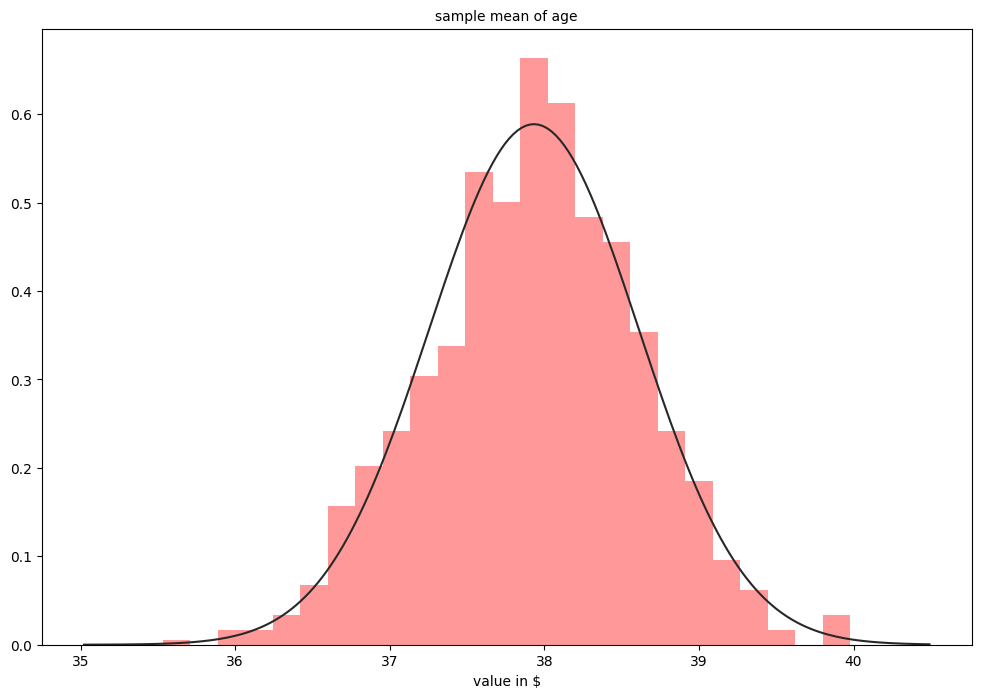

In [123]:
plt.figure(figsize=(12,8))
plt.title('sample mean of age',size=10)
plt.xlabel('value in $',size=10)
sns.distplot(mean_sample_values,fit=norm,color='red',kde=False)

In [126]:
sample_num=1000
sample_size=300
median_sample_values=[]

for i in range(sample_num):
    sample_median=np.median(np.random.choice(age,sample_size,replace=True))
    median_sample_values.append(sample_median)

C:\Users\pjspr\AppData\Local\Temp\ipykernel_19324\666587161.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(median_sample_values,fit=norm,color='red',kde=False)


<AxesSubplot: title={'center': 'sample mean of age'}, xlabel='value in $'>

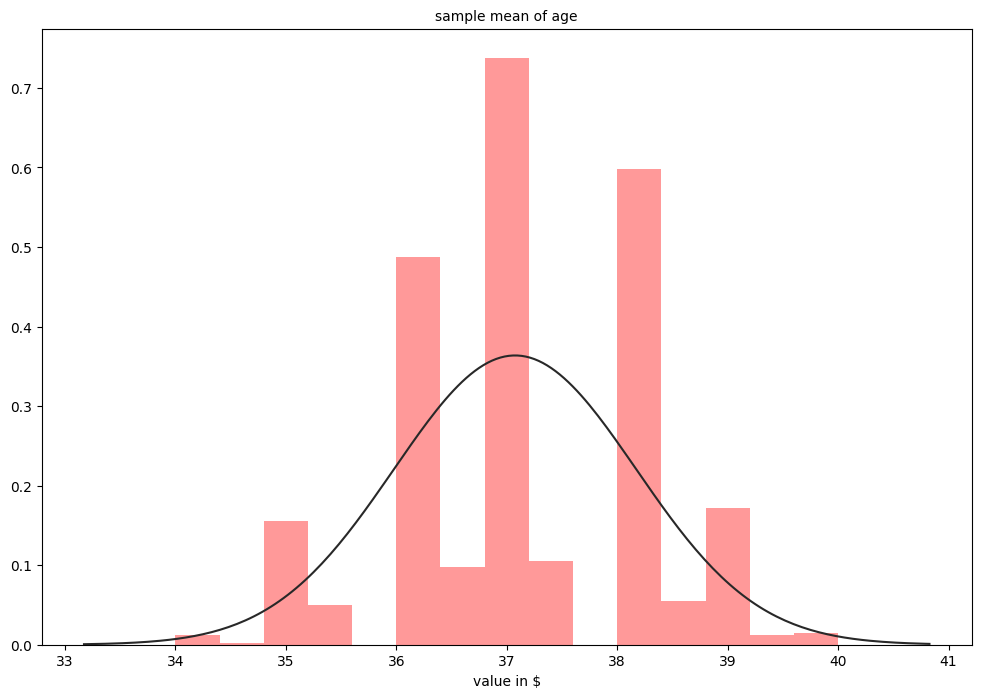

In [127]:
plt.figure(figsize=(12,8))
plt.title('sample mean of age',size=10)
plt.xlabel('value in $',size=10)
sns.distplot(median_sample_values,fit=norm,color='red',kde=False)